<a href="https://colab.research.google.com/github/scskalicky/LING-226-vuw/blob/main/14_Conditional_Frequency_Distributions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Conditional Frequency Distributions

We have explored word frequency as a variable for different texts using `nltk.FreqDist()`. In this notebook, we will explore another function called `nltk.ConditionalFreqDist()`.

A Conditional Frequency Distribution extends a frequency distribution but in addition includes additional subcategories over which to form the distribution. For example, we *could* ask for a frequency distribution of modals over the entire Brown corpus, regardless of genre. This would be a simple frequency distribution.

When we ask for this frequency distribution to be *dependent* upon more than one category, we are placing a *condition* on the frequency counts, making it a conditional frequency distribution.

Why do we care about conditional frequency distributions? Because it is a way to directly compare different categories or subsets within a larger set of data.


Consider the following simplistic example which compares the frequency of words between two conditions.

In [1]:
# import nltk
import nltk

In [2]:
# Create two conditions: condition a and condition b.
# You can see how they differ in terms of the frequency of colours in each example
# condition a has yellow twice, and blue three times
# condition b has one of each: yellow, blue, red
condition_a = ['yellow', 'yellow', 'blue', 'blue', 'blue']
condition_b = ['yellow', 'blue', 'red']

# combine the conditions by concatenating the list
combined_conditions = condition_a + condition_b

# now everything is in one list
combined_conditions

['yellow', 'yellow', 'blue', 'blue', 'blue', 'yellow', 'blue', 'red']

If we ask for a `FreqDist()` of the combined conditions, we get an impression of frequency among these three colors:

In [3]:
# combined frequency distribution
fdistab = nltk.FreqDist(combined_conditions)
fdistab

FreqDist({'blue': 4, 'yellow': 3, 'red': 1})

However we have no way of knowing whether blue "likes" one condition over the other, or whether these colors occur equally among our conditions. So we could run a frequency distribution on each condition, separately:

In [4]:
# Frequency Distribution of condition a
fdista = nltk.FreqDist(condition_a)
fdista

FreqDist({'blue': 3, 'yellow': 2})

In [5]:
# Frequency distribution of condition b
fdistb = nltk.FreqDist(condition_b)
fdistb

FreqDist({'yellow': 1, 'blue': 1, 'red': 1})

We can compare the output and see that the two different conditions have different amounts of each color. But having to do this manually and then potentially combine the results is tiring and we would like a more efficient process.

We can use the `nltk.ConditionalFreqDist()` function to do these things for us. This function will count the number of colours across both conditions. To use `ConditionalFreqDist()` (CFD), we have to provide the function with the required pieces of information:

1. the conditions and
2. the thing being counted.

We then instruct the CFD function how to loop - first by condition, and then by sample (which will essentially make a nested `for loop`). Let's first transform our lists above into a dictionary structure to help clarify what is going on here. Look at the dictionary below - there are two keys (a and b), each with a list of colors.


In [6]:
# first combine our lists so that they are nested in a dictionary
combined_colors = {'a': ['yellow', 'yellow', 'blue', 'blue', 'blue'],
                   'b': ['yellow', 'blue', 'red']}

the `ConditionalFreqDist()` function is effectively nested loops, which can be difficult to get a grasp on at first (and probably why the authors of NLTK say to not worry about it right away). See if you can understand what the double loop is doing in the example below:

In [7]:
# first loop through the condition
# and THEN loop through the keys of that condition, making a freq dist each time.

color_cfd = nltk.ConditionalFreqDist((condition, color) # our pairs: condition = condition, color = sample
  for condition in combined_colors # for key in dictionary, in this case a, and then b...
  for color in combined_colors[condition]) # create freqDist of each item in the values of a and then b

In [8]:
# verify the different condition
color_cfd.conditions()

['a', 'b']

In [9]:
# it's helpful to know that the resulting object is fundamentally a dictionary
color_cfd.keys()

dict_keys(['a', 'b'])

In [10]:
# so we can query the conditions
color_cfd['a']['blue']

3

In [11]:
# look at the whole thing - you see they are just multiple FreqDist
color_cfd.items()

dict_items([('a', FreqDist({'blue': 3, 'yellow': 2})), ('b', FreqDist({'yellow': 1, 'blue': 1, 'red': 1}))])

So, really, the conditional frequency distribution is similar to the normal frequency distribution, it just has more layers and categories.

The CFD also has a few different functions. We can visualize the different counts in a matrix, which helps clarify both the presence and the absence of values in each of the two conditions. Blue clearly prefers "a", while "b" allows for all three colours.

In [12]:
# the built in tabulate method lets you make a nice table for comparison.
color_cfd.tabulate()

    blue    red yellow 
a      3      0      2 
b      1      1      1 


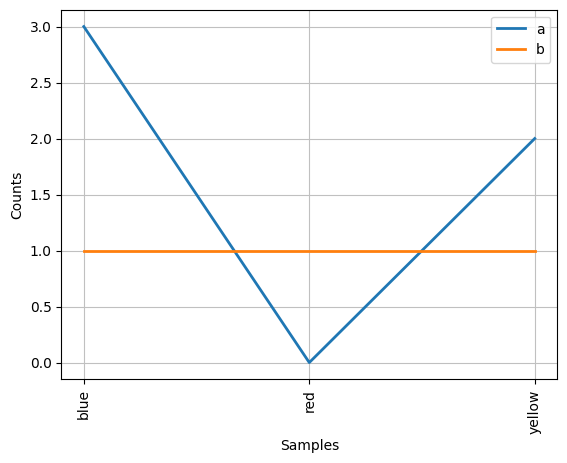

<Axes: xlabel='Samples', ylabel='Counts'>

In [40]:
# we can also make little plots, neato!
color_cfd.plot()

# Conditional Frequency Distributions with Brown Corpus

Now compare that color example to the CFD on the Brown corpus from the NLTK book. Genre is the condition (where above it was 'a' or 'b') and word frequency is the sample (where above it was the frequency of colours).

We are essentially asking for the frequency of each word in `modals` conditioned by the different genres in brown.

In [14]:
# download the required resources first.
nltk.download('brown')
from nltk.corpus import brown

[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\Ming\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!


In [15]:
# first create a CFD of *all* the words in Brown corpus, conditioned on genre.

cfd = nltk.ConditionalFreqDist(
           (genre, word) # condition = genre, sample = word
           for genre in brown.categories() # for each genre in Brown
           for word in brown.words(categories = genre)) # for each word in the genre

Now that we have created a conditional frequency distribution across the entire corpus, we can define more precise queries based on words and genres we are interested in.

In [16]:
# create a list of all the Brown genres
genres = ['news', 'religion', 'hobbies', 'science_fiction', 'romance', 'humor']

# let's again look at modal verbs only
modals = ['can', 'could', 'may', 'might', 'must', 'will']

# Ask the CFD to give us frequency of modals across all genres
cfd.tabulate(conditions = genres, samples = modals)

                  can could   may might  must  will 
           news    93    86    66    38    50   389 
       religion    82    59    78    12    54    71 
        hobbies   268    58   131    22    83   264 
science_fiction    16    49     4    12     8    16 
        romance    74   193    11    51    45    43 
          humor    16    30     8     8     9    13 


What do these results say about word use across different genres?

## Comparing News and Romance

Allow me to copy the Your Turn straight from the NLTK book:

> *Your Turn: Working with the news and romance genres from the Brown Corpus, find out which days of the week are most newsworthy, and which are most romantic. - Define a variable called days containing a list of days of the week, i.e. `['Monday', ...]`*.

> Now tabulate the counts for these words using `cfd.tabulate(samples = days)`.

> Now try the same thing using plot in place of tabulate. You may control the output order of days with the help of an extra parameter: `samples = ['Monday', ...]`.

In [19]:
# first create the brown cfd
brown_cfd = nltk.ConditionalFreqDist(
  (genre, word)
  for genre in brown.categories() # for each genre in the corpus
  for word in brown.words(categories=genre)) # then for each word in the genre

In [20]:
# Create the list of words you are interested in
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# then tabulate them
brown_cfd.tabulate(conditions = ['romance', 'news'], samples = days, cumulative=True)

           Monday   Tuesday Wednesday  Thursday    Friday  Saturday    Sunday 
romance         2         5         8         9        12        16        21 
   news        54        97       119       139       180       213       264 


In [ ]:
# plot them
brown_cfd.plot(conditions = ['romance', 'news'], samples = days, cumulative = True)

What other words might make for an interesting comparison between different genres in the brown corpus? You can apply the same ideas from above to do you own investigations. Can you locate some words which clearly define different genres?

In [28]:
# try looking for comparisons of different words/genres in the Brown corpus.
test = nltk.ConditionalFreqDist(
    (genre, word)
    for genre in brown.categories()
    for word in brown.words(categories=genre)
)

In [38]:
test.tabulate(conditions=["fiction", "humor", "news", "reviews"], samples=["was", "know", "name", "love"])

         was know name love 
fiction 1082   75   23   16 
  humor  274   16    5    4 
   news  717   28   15    3 
reviews  227   14    7    7 


In [53]:
myText = open("./the-current/tp002.txt", encoding="utf8").read().rstrip()

test1 = nltk.ConditionalFreqDist(
    (word, count)
    for word in myText.split('\n')
    for count in word.split()
)

test1.tabulate(conditions=["1\tI hope that they do because I want them to", "3\tbecuase i hate it when people dye... its just sad!", "2", "3"], samples=["that", "1", "they", "fish"])

test1.keys()

                                                     that    1 they fish 
        1	I hope that they do because I want them to    1    1    1    0 
3	becuase i hate it when people dye... its just sad!    0    0    0    0 
                                                   2    0    0    0    0 
                                                   3    0    0    0    0 


dict_keys(["0\tI agree with this idea but there also needs to be some system of dealing with bi-catch. I don't want fish caught to be wasted just because those fishing commercially have accidentally caught the wrong species while targeting the sustainable fish stocks.", '1\tIt will make us more mindful of our consumption and lessen the burden we place on the sea', '1\tI would prefer to eat only sustainable food', '0\tIt ecourages ethical choices. Provide sthe means to make that choice as or when you can afford it. One week you may only have money for cheap/unethical meat, next week you have the budget for making the choice to buy free range pork/chicken or sustainable fish.', "1\tThe ocean is a precious ecosystem - we really can't keep fishing unsustainably.", '0\tWe need to think more carefully about what we are eating and why, by only selling sustainably caught fish the demand for other fishing will reduce.', "0\tYes! We have to set some regulations and guidelines. There'll be a flow

## **Discussion**

Now we are getting somewhere! We have a clear list of how modal verbs pattern across the different genres in Brown. We also have some interesting results about days of the week.

Take a moment to inspect the way different genres employ modal verbs.

- What can you say about romance vs news, for example?
- Moreover, can you think of any potential mistakes we are making by comparing these direct frequency counts?
- Any other words you would be interested in comparing?
  - have a play with possible word targets and report your results.

# Inaugural Address corpus

Chapter 2 of NLTK includes several visualizations of the Conditional Frequency Distribution. One corpus they use is the inaugural corpus, which is a collection of speechs given by US presidents after they began a new term (so, one occurs every four years).

Before looking at the CFD, load in the resource and familiarise yourself with the corpus.



In [54]:
# load in required resources
nltk.download('inaugural')
from nltk.corpus import inaugural

[nltk_data] Downloading package inaugural to
[nltk_data]     C:\Users\Ming\AppData\Roaming\nltk_data...
[nltk_data]   Package inaugural is already up-to-date!


In [55]:
# each file id contains the year and name of the US president
inaugural.fileids()

['1789-Washington.txt',
 '1793-Washington.txt',
 '1797-Adams.txt',
 '1801-Jefferson.txt',
 '1805-Jefferson.txt',
 '1809-Madison.txt',
 '1813-Madison.txt',
 '1817-Monroe.txt',
 '1821-Monroe.txt',
 '1825-Adams.txt',
 '1829-Jackson.txt',
 '1833-Jackson.txt',
 '1837-VanBuren.txt',
 '1841-Harrison.txt',
 '1845-Polk.txt',
 '1849-Taylor.txt',
 '1853-Pierce.txt',
 '1857-Buchanan.txt',
 '1861-Lincoln.txt',
 '1865-Lincoln.txt',
 '1869-Grant.txt',
 '1873-Grant.txt',
 '1877-Hayes.txt',
 '1881-Garfield.txt',
 '1885-Cleveland.txt',
 '1889-Harrison.txt',
 '1893-Cleveland.txt',
 '1897-McKinley.txt',
 '1901-McKinley.txt',
 '1905-Roosevelt.txt',
 '1909-Taft.txt',
 '1913-Wilson.txt',
 '1917-Wilson.txt',
 '1921-Harding.txt',
 '1925-Coolidge.txt',
 '1929-Hoover.txt',
 '1933-Roosevelt.txt',
 '1937-Roosevelt.txt',
 '1941-Roosevelt.txt',
 '1945-Roosevelt.txt',
 '1949-Truman.txt',
 '1953-Eisenhower.txt',
 '1957-Eisenhower.txt',
 '1961-Kennedy.txt',
 '1965-Johnson.txt',
 '1969-Nixon.txt',
 '1973-Nixon.txt',
 '1

In [57]:
# remember, raw returns a string from the .txt file.
# here I pick a set of words from the string to find an interesting quote.
inaugural.raw('1945-Roosevelt.txt')[1025:1152]

'We may make mistakes -- but they must never be mistakes which result from faintness of heart or abandonment of moral principle.'

## Conditional Frequency Distribution of Inaugural

Okay, the NLTK book shows how to do this, but let's repeat the process here. In the book, the authors want to examine how specific words change over time in the address. In particular, they are interested in examining how the words "america" and "citizen" change in frequency over the years. They do so using a CFD of this corpus. In this CFD, the frequency of these words are the samples, and the category or condition will be the year.  

The CFD below packs a lot of information into the code.

- In line 3, the first two arguments `(target, fileid[:4)` represent the word being searched and the category.
  - the use of `fileid` means each file is considered its own category or condition
  - slicing the fileid this way gives us the first 4 characters, which is the year
- In line 4, a loop is then initiated over the list of filedids in the corpus.
- In line 5, a nested loop then runs over the words of a single file, represented as `w`
- In line 6, an additional nested loop then loops over the two target words
- In line 7, the code askes whether `w` starts with the target. The use of `.startswith()` is a way to check if the word is the target.




In [84]:
# CFD of Inaugural
inaugural_cfd = nltk.ConditionalFreqDist(
  (target, fileid[:4]) # try this with and without fileid being sliced, so you understand why they did this
  for fileid in inaugural.fileids()
  for w in inaugural.words(fileid)
  for target in ['america', 'citizen']
  if w.lower().startswith(target))

inaugural_cfd1 = nltk.ConditionalFreqDist(
  (target, fileid[:4]) # try this with and without fileid being sliced, so you understand why they did this
  for fileid in inaugural.fileids()
  for w in inaugural.words(fileid)
  for target in ['america', 'citizen']
  if target in w.lower() )

Again, the code is quite a bit to digest. Make sure you slowly go through it and understand each line. Then, inspect the results below:

In [85]:
# inspect the matrix of results
inaugural_cfd.tabulate()
print( " ")
inaugural_cfd1.tabulate()

        1789 1793 1797 1801 1805 1809 1813 1817 1821 1825 1829 1833 1837 1841 1845 1849 1853 1857 1861 1865 1869 1873 1877 1881 1885 1889 1893 1897 1901 1905 1909 1917 1921 1925 1929 1933 1937 1941 1945 1949 1953 1957 1961 1965 1969 1973 1977 1981 1985 1989 1993 1997 2001 2005 2009 2013 2017 2021 
america    2    1    8    0    1    0    1    1    2    0    0    2    2    7    0    2    2    3    2    1    0    0    1    2    4    6    9    9    7    0   12    4   24   11   12    2    5   12    2    4    6    7    7   10   10   23    5   16   21   11   33   31   20   30   15   19   35   40 
citizen    5    1    6    7   10    1    4   14   15    3    2    3    7   38   11    2    4    7    7    0    5    3    9    9   13   12   10   10    2    1    6    3    6    5   12    1    2    1    1    1    7    0    5    4    1    1    0    3    6    3    2   10   11    7    2    8    4    1 
 
        1789 1793 1797 1801 1805 1809 1813 1817 1821 1825 1829 1833 1837 1841 1845 1849 1853 1857 186

In [81]:
[w for w in inaugural.words('1789-Washington.txt')]
#"joe" in ("joe")
#inaugural.fileids()

['Fellow',
 '-',
 'Citizens',
 'of',
 'the',
 'Senate',
 'and',
 'of',
 'the',
 'House',
 'of',
 'Representatives',
 ':',
 'Among',
 'the',
 'vicissitudes',
 'incident',
 'to',
 'life',
 'no',
 'event',
 'could',
 'have',
 'filled',
 'me',
 'with',
 'greater',
 'anxieties',
 'than',
 'that',
 'of',
 'which',
 'the',
 'notification',
 'was',
 'transmitted',
 'by',
 'your',
 'order',
 ',',
 'and',
 'received',
 'on',
 'the',
 '14th',
 'day',
 'of',
 'the',
 'present',
 'month',
 '.',
 'On',
 'the',
 'one',
 'hand',
 ',',
 'I',
 'was',
 'summoned',
 'by',
 'my',
 'Country',
 ',',
 'whose',
 'voice',
 'I',
 'can',
 'never',
 'hear',
 'but',
 'with',
 'veneration',
 'and',
 'love',
 ',',
 'from',
 'a',
 'retreat',
 'which',
 'I',
 'had',
 'chosen',
 'with',
 'the',
 'fondest',
 'predilection',
 ',',
 'and',
 ',',
 'in',
 'my',
 'flattering',
 'hopes',
 ',',
 'with',
 'an',
 'immutable',
 'decision',
 ',',
 'as',
 'the',
 'asylum',
 'of',
 'my',
 'declining',
 'years',
 '--',
 'a',
 'retreat

## Slicing meta data from filenames

How does this code figure out the year of each file? The answer is that information is included in the filename. Each filename in the Inaugural corpus is in this format:

```
YEAR-name.txt
```

Look again at line 3 in the CFD code cell above, the code asks for target and `fileid[:4]`. Slicing to 4 on fileid will return the first four characters of the filename, which happens to be the year. So this is a trick that would only work if all the filenames are standardized to follow the same format.

What would happen if you just used `fileid` without slicing the year?

In [79]:
# use this one simple trick to get years!
'1945-Roosevelt.txt'[:4]

'1945'

## Plotting the CFD

You can plot the frequency distribution using the built-in `plot()` method for the CFD, although I've found the plots are small and you may want to use the code below to increase the size of the plot.

Examine the plot - what is it the authors of NLTK wanted you to notice about the use of `american` and `citizen` in inaugural US presidential speeches over time?


Because the filename of each file in this corpus includes the year as the first four characters, the authors could use this as a label. There is only one speech for any year in the data because these are the speeches given by US presidents when they are elected.

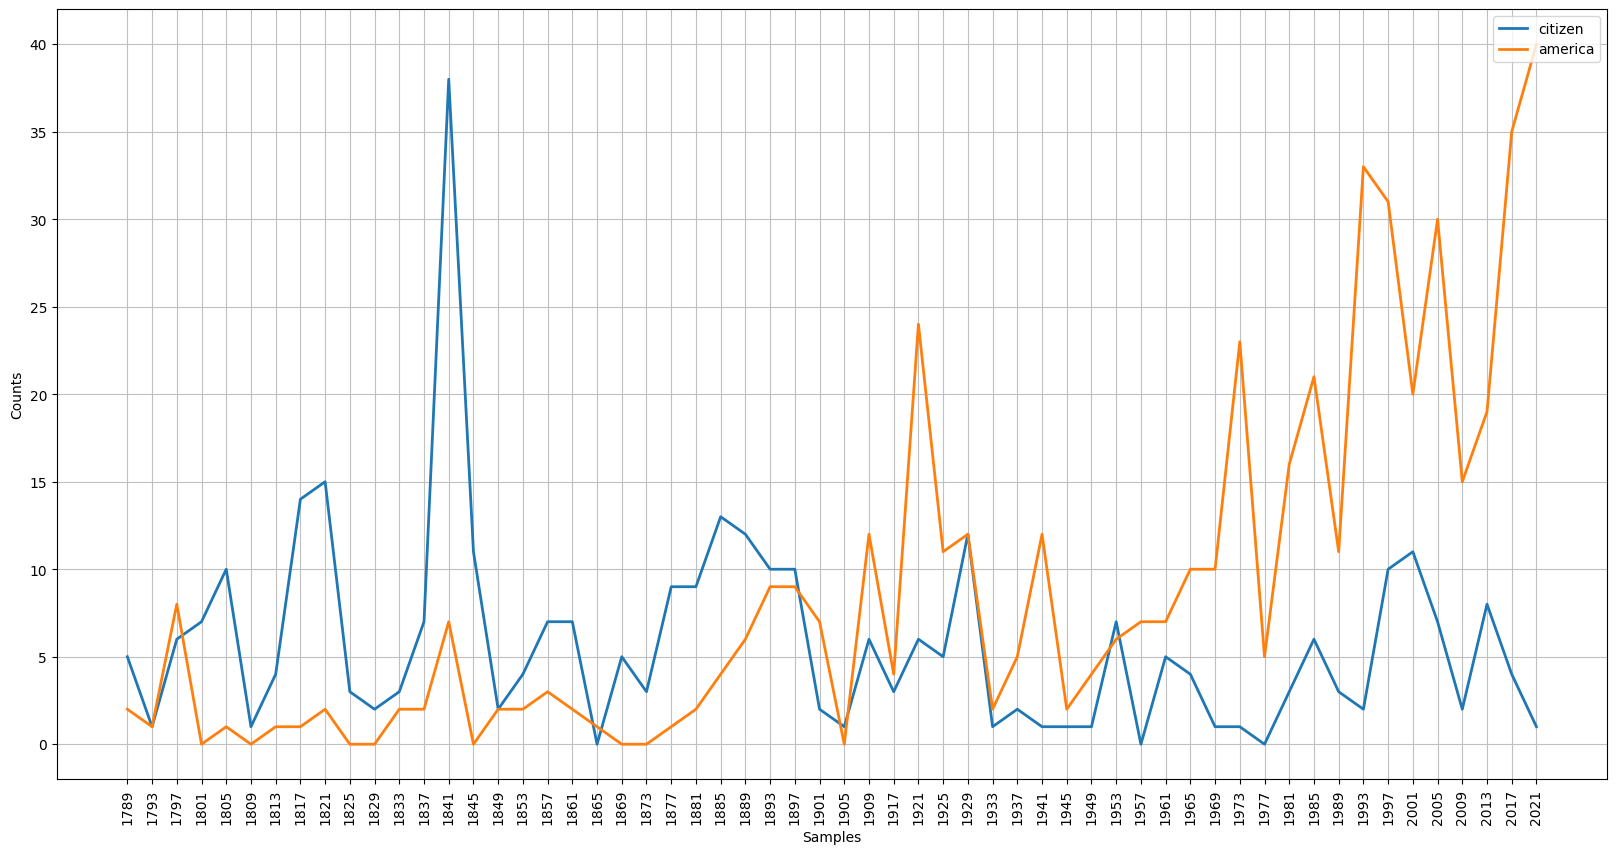

<Axes: xlabel='Samples', ylabel='Counts'>

In [86]:
# the plot on its own is quite small, use this code to make the plot larger
import matplotlib.pyplot as plt
# define the size of the figure
plt.figure(figsize = (20, 10))

# then render the plot:
inaugural_cfd.plot()

The plot has frequency counts on the y-axis and year represented on the x-axis. This makes it a bit easier to compare.

## **Your Turn / Discussion**

- What do you think of the way these terms rise and fall over the years? Do you think it can be attributed to events during that time, specifics of the speaker, or some combination of those and other factors?
- Play around with the Inaugural Corpus - what other words might make for an interesting comparison over time?
- What might be a problem with using raw frequency counts from these different text files?

# Creating Your Own Categorized Corpus

In a prior notebook you were shown how to convert text files into an NLTK corpus object. Let's extend that now and use the `CategorizedPlaintextCorpusReader` to make a corpus with categories/genres.

In order to do so, we need some text files, and we also need a way to indicate what genre/category we would like those files to belong to. Let's follow the NLTK authors and extract this information from the filenames.

As an example, let's use some data from a [paper I published in 2015.](https://europeanjournalofhumour.org/index.php/ejhr/article/view/68)

In this paper, I analysed the linguistic properties of product reviews written for the American retail website Amazon.com. I was interested in two types of reviews: legitimate review and satirical/funny reviews.

You can download the data from the [LING226 GitHub](https://github.com/scskalicky/LING-226-vuw/blob/main/other-data/amazon%20reviews.zip). Download the .zip file, save it to your Google Drive and  unzip it.

In the folder are 375 normal reviews and 375 satirical reviews.

The name of each file looks like this:
```
001-5-satire.txt
002-2-normal.txt
```

The first three numbers are the ID number, ranging from 1 - 375. The second number (between the two `-`) is the star rating of the review, from 1-5. The words `satire` or `normal` indicate whether the review was a normal review or a satirical funny review.

We can exploit this information to make categories in our corpus. Just as the authors of NLTK sliced the year from the filename to examine change over time, we can do the same thing with these filenames to get different categories.

In [87]:
# first we will load in the Corpus Reader and define the location of our texts
import nltk
from nltk.corpus.reader.plaintext import CategorizedPlaintextCorpusReader

# set the corpus location to point to wherever it is you saved the data
# (you may need to mount your Drive to the notebook)
corpus_location = './amazon-reviews/'

Now to use the filenames as categories, we will explot a little bit more about regular expressions (regex) patterns. What you can do now is know that we can define a pattern to capture the `normal` or `satire` portions of the filesnames using this pattern:

```
.*(......).txt
```

This pattern captures whatever is in the brackets `()`, and says give me the last six characters before `.txt` of my pattern.

It corresponds to:

```
001-5-(satire).txt
002-2-(normal).txt
```

Try it out:

In [88]:
# create a categorised corpus
amz_corpus = CategorizedPlaintextCorpusReader(root = corpus_location, fileids = '.*', cat_pattern = '.*(......).txt')

# you can check the categories
amz_corpus.categories()

['normal', 'satire']

In [89]:
# and we still have our fileids
amz_corpus.fileids()

['001-5-normal.txt',
 '001-5-satire.txt',
 '002-2-normal.txt',
 '002-5-satire.txt',
 '003-1-satire.txt',
 '003-3-normal.txt',
 '004-5-normal.txt',
 '004-5-satire.txt',
 '005-1-satire.txt',
 '005-4-normal.txt',
 '006-5-normal.txt',
 '006-5-satire.txt',
 '007-4-normal.txt',
 '007-5-satire.txt',
 '008-5-normal.txt',
 '008-5-satire.txt',
 '009-1-normal.txt',
 '009-5-satire.txt',
 '010-5-normal.txt',
 '010-5-satire.txt',
 '011-1-normal.txt',
 '011-5-satire.txt',
 '012-1-satire.txt',
 '012-5-normal.txt',
 '013-5-normal.txt',
 '013-5-satire.txt',
 '014-1-satire.txt',
 '014-4-normal.txt',
 '015-1-satire.txt',
 '015-4-normal.txt',
 '016-5-normal.txt',
 '016-5-satire.txt',
 '017-4-normal.txt',
 '017-5-satire.txt',
 '018-5-normal.txt',
 '018-5-satire.txt',
 '019-3-normal.txt',
 '019-5-satire.txt',
 '020-3-normal.txt',
 '020-5-satire.txt',
 '021-3-normal.txt',
 '021-5-satire.txt',
 '022-2-normal.txt',
 '022-5-satire.txt',
 '023-1-satire.txt',
 '023-5-normal.txt',
 '024-5-normal.txt',
 '024-5-satir

Now that we've made our corpus, we can create CFD tabulations and plots just like the NLTK book did for Brown corpus.

Let's compare different words between the satirical and regular reviews.



In [90]:
# Create a CFD of the amazon corpus
# I am using the same code as the one for Brown with towo modifications:
# I have replaced "genre" with "review_type"
# I lowercase the words in the corpus
amz_cfd = nltk.ConditionalFreqDist(
    (review_type, word)
    for review_type in amz_corpus.categories()
    for word in [w.lower() for w in amz_corpus.words(categories = review_type)]
)

In [92]:
# let's ask for some specific words
pronouns = ['i', 'me', 'you', 'my']

# then tabulate them
amz_cfd.tabulate(conditions = ['normal', 'satire'], samples = pronouns, cumulative = True)

          i   me  you   my 
normal 2547  200  959  626 
satire 3773  625  744 1689 


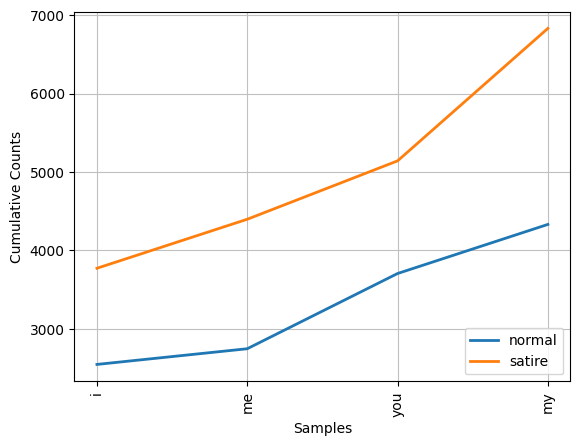

<Axes: xlabel='Samples', ylabel='Cumulative Counts'>

In [93]:
# we can also plot this.
amz_cfd.plot(conditions = ['normal', 'satire'], samples = pronouns, cumulative = True)

In [94]:
# what about some other words?
emotions = ['good', 'bad', 'happy', 'sad']
amz_cfd.tabulate(conditions = ['normal', 'satire'], samples = emotions, cumulative = True)

        good   bad happy   sad 
normal   215   255   287   289 
satire    95   130   163   167 


We can also wrap individual files from our corpus in `Text` so that we can look for concordances

In [95]:
# Wrap the whole set of words to look at all concordances
nltk.text.Text(amz_corpus.words()).concordance('terrible')

Displaying 12 of 12 matches:
. Then there was that Friday , the terrible Friday that would ruin every Frida
 my own mouth stretched agape in a terrible rictus of agony , I deduced the so
 have all suffered from making the terrible mistake of vandalizing ones self i
es in . " It ' s like some kind of terrible grad school thesis ." But right ar
hine . Good for Writing on Paper - Terrible for Stirring Coffee , Prying thing
 one crispy hare . That isn ' t so terrible if you had decided to season it fi
ter the first few days I noticed a terrible odor coming from the animal and my
ll him a washed up soap star , his terrible bouffant hair cut and cheesey grin
iful healing powers . I got into a terrible car accident just a few months ago
s . The last set we had were truly terrible . So my opinion might be somewhat 
her when she came home . She was a terrible cook and refused to learn . But sh
 didn ' t buy it because it looked terrible and smelled like green peas and ca


In [96]:
# we can also look at concordances for just one category to compare them
# the word "banana" is strongly associated with the satire corpus
nltk.text.Text(amz_corpus.words(categories = 'satire')).concordance('banana')

Displaying 25 of 99 matches:
No more winning for you , Mr . Banana !, For decades I have been trying t
ome up with an ideal way to slice a banana . " Use a knife !" they say . Well 
ll in anger . Then , after a fit of banana - induced rage , my parole officer 
k I ' ll call it South Side Story . Banana slicer ... thanks to you , I see gr
age , What can I say about the 571B Banana Slicer that hasn ' t already been s
tly over who had to cut the day ' s banana slices . It ' s one of those chores
r bedroom , re - enacting our daily banana fight with her Barbie dolls , I kne
ge . That ' s when I found the 571B Banana Slicer . Our marriage has never bee
t into our lovemaking . THANKS 571B BANANA SLICER ! This product ruined my lif
 - better than anyone - was slice a banana into perfect , even slices . My wor
orning and found a perfectly sliced banana , just waiting for her cereal and m
she quickly prepared perfect , even banana slices and scattered them lazily on
ce of plastic with perfectly

In [97]:
# but only occurs once in the non-satire corpus.
nltk.text.Text(amz_corpus.words(categories = 'normal')).concordance('banana')

Displaying 1 of 1 matches:
s of " What ?!? Is this guy smoking banana peels ?" Most assuredly he is not .


## **Your Turn**

What else can you do with this corpus in terms of comparisons? You may want to scan the Skalicky and Crossley (2015) article, particularly Table 2 which lists some word categories that differed between the two review types. Think of some words that might reflect those categories - negation would include *not*, *no*, *never*, etc., whereas quantifier might include *many*, *few*, *some*, and so on. Can you find some differences in words between the two corpora using a combination of CFD and concordance lines?

# **Wrap Up**

Being able to create your own corpus and make a comparison across categories in your corpus is a good way to develop your assessments in this course.

At this point you might want to spend some time thinking about how to make your own corpus. Or, you might want to play more with this amazon review corpus. For instance - another piece of information you could pull from the corpus is the review rating which is located in the middle of the filename. The pattern to do so would be:

```
.*-(.)-.*.txt
```

Of course, you might still want to keep the satire/normal category, so perhaps expand your pattern to:

```
.*-(.-.*).txt
```

This would give you ten categories. I've typed the code below should you like to use that and do further comparisons.

In [ ]:
# create a categorised corpus
amz_corpus2 = CategorizedPlaintextCorpusReader(root = corpus_location, fileids = '.*', cat_pattern = '.*-(.-.*).txt')

# you can check the categories
amz_corpus2.categories()

In [103]:
l1 = [1,2,3,4,5,6,7,8,9,0,11,12,13,14,1,51,6][::5]
print(l1)

[1, 6, 11, 51]
